# Defining The Problem

## We want to identfy a flower into 3 distinct classes based on 4 different measurements

### This is a classification problem akin to being able to predict the class of a customer based on their properties ;) 

## This is a classic public data set in the data science community which people build models for and analyze for fun or practice. 

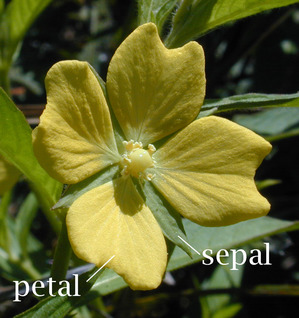

In [20]:
from IPython.display import Image
Image("Iris_Case_Study/Iris1.jpg")


## Above we can see the two features we will have measurements for - The Petal and Sepal of a flower.  We have a Petal_Width, Petal_Length, Sepal_Width, and Sepal_Length (again imagine any number of properties of a customer, or garage, etc...)

# Below we will see the 3 types of flowers we want to be able to classify

# Iris Setosa

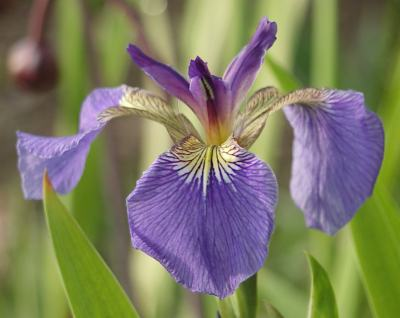

In [21]:
Image("Iris_Case_Study/Iris_setosa.jpg")

# Iris Virginica

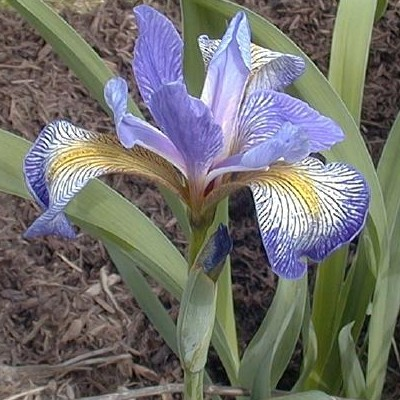

In [22]:
Image("Iris_Case_Study/Iris_virginica.jpg")

# Iris Versicolor

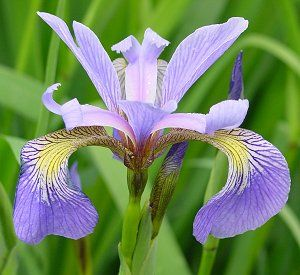

In [23]:
Image("Iris_Case_Study/Iris_versicolor.jpg")

# As you can see, by sight it is *very* difficut to differentiate these flowers. Not With a Classifier!

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [27]:


# reading the csv data and assigning to variable. inspecting the first few rows of the dataframe
iris_data = pd.read_csv('Iris_Case_Study/iris-data.csv')
iris_data.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#telling pandas to treat the rows with NA as rows with missing values
iris_data = pd.read_csv('Iris_Case_Study/iris-data.csv', na_values=['NA'])

#describing our data
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


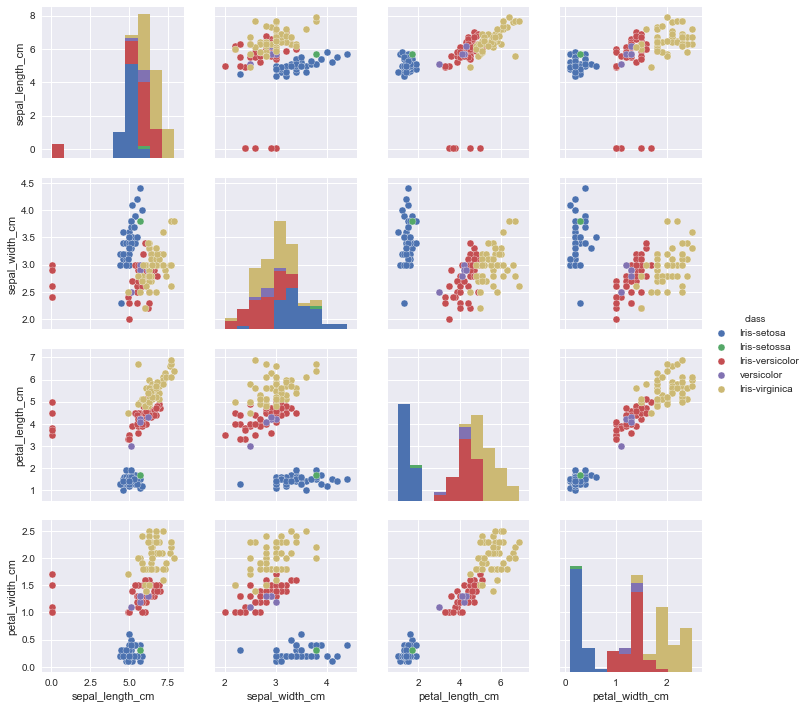

In [30]:
# lets plot!
sb.pairplot(iris_data.dropna(), hue='class')

# I see some issues(o values, misspellings)! Oh no lets tidy the data 

In [38]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

#iris_data['class'].unique()

# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
#iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

#iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

#iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


# Now our Data is Clean, lets look at the dist of data again

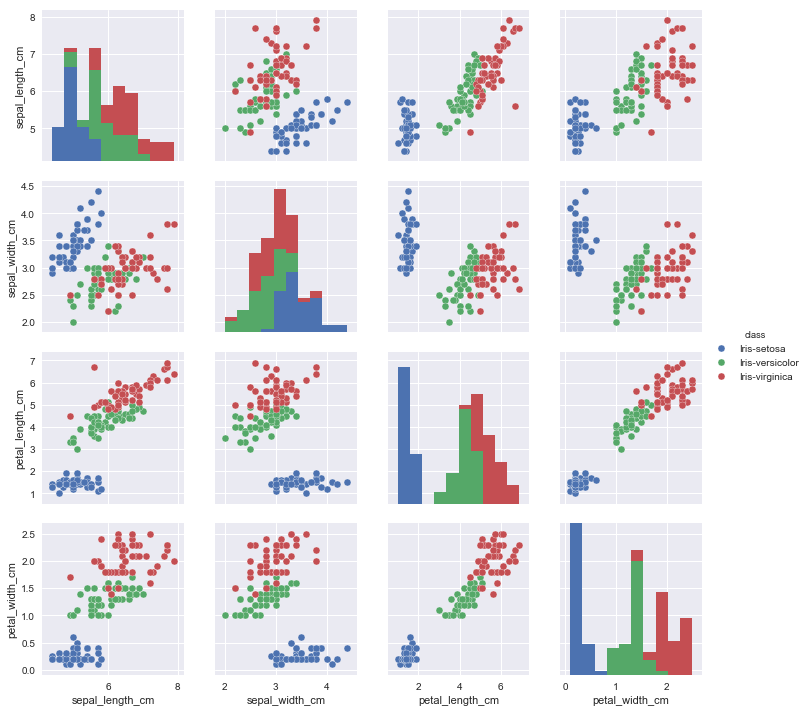

In [39]:
#Now our data is clean lets rename and replot!
iris_data.to_csv('Iris_Case_Study/iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('Iris_Case_Study/iris-data-clean.csv')
sb.pairplot(iris_data_clean, hue='class')

# Awesome. the next section condenses a lot of the modeling/testing/validation/analysis into one chunk for brevity.

## Below we perform

    - testing of a single decision tree accuracy
    - testing of bootstrab subsampling accuracy
    - k fold cross validation
    - grid search
    - comparison against random forest
    - random forest classification

[ 6.7  3.   5.2  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 4.4  3.2  1.3  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.3  3.3  4.7  1.6]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 6.   2.9  4.5  1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 6.   2.2  4.   1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.5  2.6  4.4  1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.5  3.5  1.3  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.1  3.   4.6  1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.7  3.   1.1  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 7.7  3.   6.1  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)


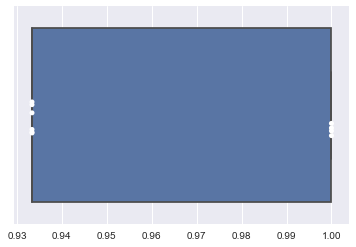

In [43]:


# We can jump directly to working with the clean data because we saved our cleaned data set
#iris_data_clean = pd.read_csv('iris_data_clean.csv')
iris_data_clean = pd.read_csv('Iris_Case_Study/iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

In [44]:
random_forest_classifier.score(testing_inputs, testing_classes)

0.97368421052631582